# Bloom Filter

### This notebook demonstrates the implementation of Bloom filter, hash functions family and their testing, as well as HPC experiments performed as a part of the project.

*The notebook assumes you have already familiarized yourself with the implementation part (**bloom_filter** and **data** folders) and continues with hash function testing*.

## Hash function testing

Let's begin by importing the hash functions and data provider methods and see how each hash function performs on different types of data.

Testing with get_natural_language_words
MD5Hash - Chi-squared: 9888.00, p-value: 0.7832, Standard Deviation: 0.99
MurmurHash - Chi-squared: 10192.00, p-value: 0.0868, Standard Deviation: 1.01
CityHash - Chi-squared: 9964.00, p-value: 0.5960, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9844.00, p-value: 0.8637, Standard Deviation: 0.99
Sha256Hash - Chi-squared: 9938.00, p-value: 0.6655, Standard Deviation: 1.00


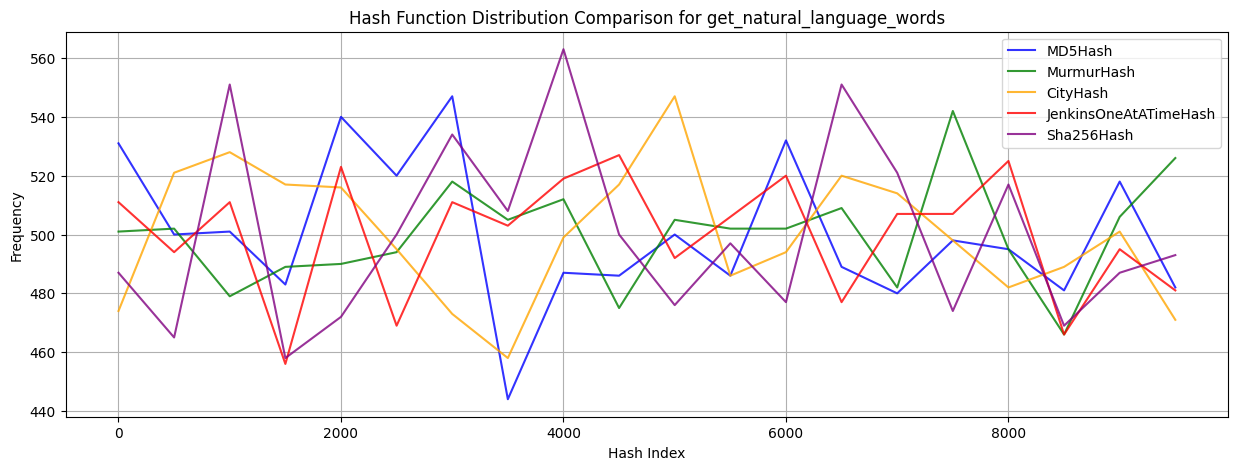

Testing with get_random_strings
MD5Hash - Chi-squared: 10454.00, p-value: 0.0008, Standard Deviation: 1.02
MurmurHash - Chi-squared: 10142.00, p-value: 0.1560, Standard Deviation: 1.01
CityHash - Chi-squared: 10012.00, p-value: 0.4615, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 10100.00, p-value: 0.2368, Standard Deviation: 1.00
Sha256Hash - Chi-squared: 10212.00, p-value: 0.0668, Standard Deviation: 1.01


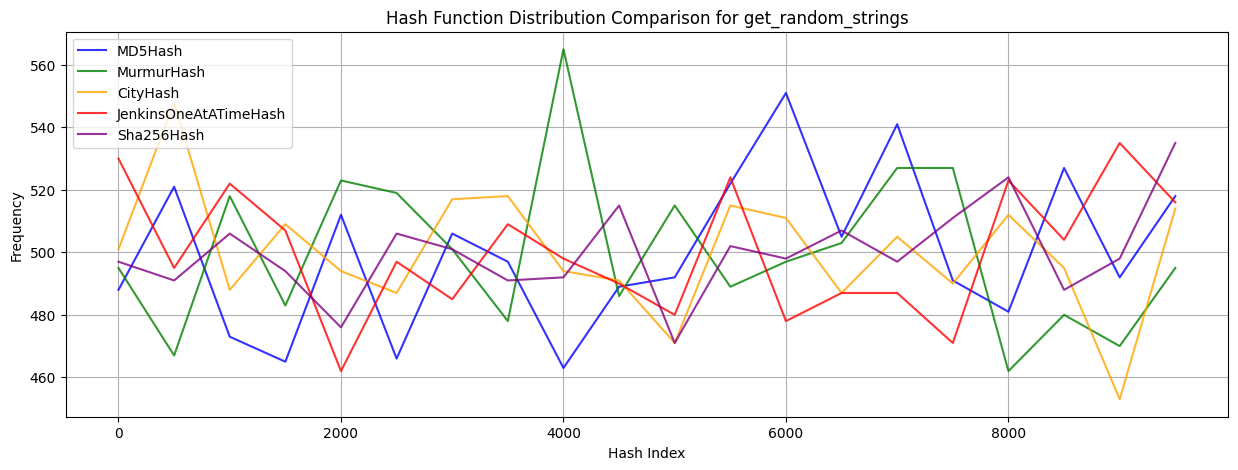

Testing with get_dna_sequences
MD5Hash - Chi-squared: 10300.00, p-value: 0.0173, Standard Deviation: 1.01
MurmurHash - Chi-squared: 9938.00, p-value: 0.6655, Standard Deviation: 1.00
CityHash - Chi-squared: 9954.00, p-value: 0.6232, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9814.00, p-value: 0.9052, Standard Deviation: 0.99
Sha256Hash - Chi-squared: 10204.00, p-value: 0.0743, Standard Deviation: 1.01


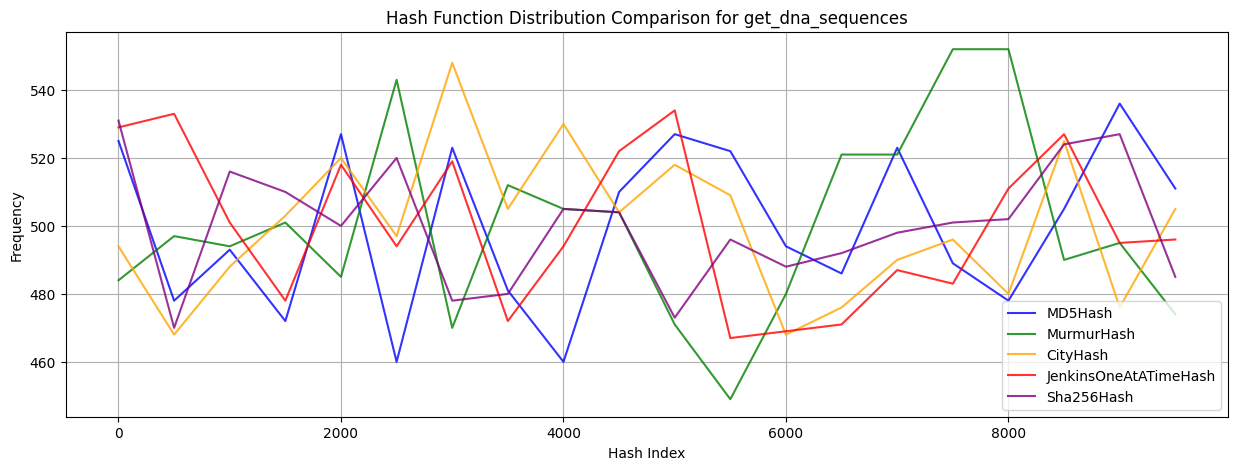

Testing with get_urls
MD5Hash - Chi-squared: 10024.00, p-value: 0.4280, Standard Deviation: 1.00
MurmurHash - Chi-squared: 9824.00, p-value: 0.8925, Standard Deviation: 0.99
CityHash - Chi-squared: 9906.00, p-value: 0.7438, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9940.00, p-value: 0.6603, Standard Deviation: 1.00
Sha256Hash - Chi-squared: 10104.00, p-value: 0.2282, Standard Deviation: 1.01


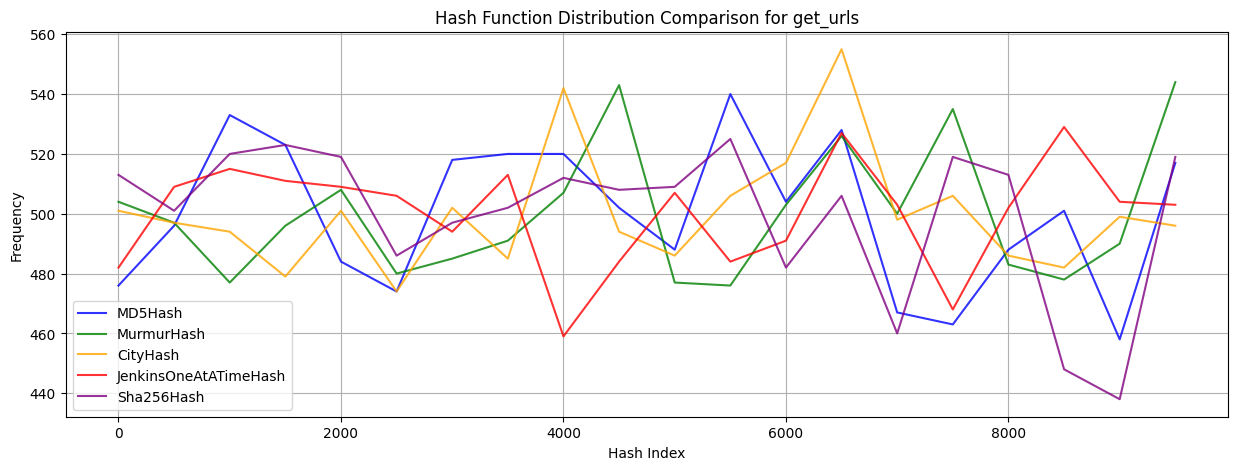

In [3]:
from bloom_filter.hash_functions.md5_hash import MD5Hash
from bloom_filter.hash_functions.murmur_hash import MurmurHash
from bloom_filter.hash_functions.city_hash import CityHash
from bloom_filter.hash_functions.jenkins_one_at_a_time_hash import JenkinsOneAtATimeHash
from bloom_filter.hash_functions.sha256_hash import Sha256Hash

from data.data_generator import get_natural_language_words, get_random_strings, get_dna_sequences, get_urls

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
import random
random.seed(42) # For reproducibility

all_hash_functions = [MD5Hash(), MurmurHash(), CityHash(), JenkinsOneAtATimeHash(), Sha256Hash()]
plot_colors = ['blue', 'green', 'orange', 'red', 'purple']
# Get data provider methods as objects to automatize testing
data_providers = [get_natural_language_words, get_random_strings, get_dna_sequences, get_urls]

hashing_size = 10000
number_of_hashes = 10000

for data_provider in data_providers:
    print(f"Testing with {data_provider.__name__}")
    # Prepare plot
    plt.figure(figsize=(15, 5))
    
    # Same dataset for each function
    dataset = data_provider(number_of_hashes)
    
    for plot_color, hash_fn in zip(plot_colors, all_hash_functions):
        hash_fn_name = hash_fn.__class__.__name__
        distribution = [0] * hashing_size
        for word in dataset:
            index = hash_fn.hash(word) % hashing_size
            distribution[index] += 1

        # Aggregation by binning in 20 bins
        bin_size = int(hashing_size/20)
        aggregated_distribution = [
            sum(distribution[i:i + bin_size]) for i in range(0, hashing_size, bin_size)
        ]
        aggregated_x = range(0, hashing_size, bin_size)
        plt.plot(aggregated_x, aggregated_distribution, label=hash_fn_name, color=plot_color, alpha=0.8, linewidth=1.5)

        # Statistical analysis is performed to see how close the distributions are to normal
        expected_mean = np.mean(distribution)
        chi2, p = chisquare(distribution)
        standard_deviation = np.std(distribution)
        print(f"{hash_fn_name} - Chi-squared: {chi2:.2f}, p-value: {p:.4f}, Standard Deviation: {standard_deviation:.2f}")

    
    plt.xlabel('Hash Index')
    plt.ylabel('Frequency')
    plt.title(f"Hash Function Distribution Comparison for {data_provider.__name__}")
    plt.legend()
    plt.grid(True)
    plt.show()

### Analysis of the results

- For the first type of data - natural English words, the best choices based on the chi-squared statistics and p-values are JenkinsOneAtATimeHash and MD5 as both provide high p-values. SHA256 and CityHash also have a good distribution. MurmurHash has a slightly worse performance.
- For random strings, CityHash performs the best, followed by JenkinsOneAtATimeHash, Murmurhash and SHA-256. MD5 has a low p-value, so it may not be suitable for this use case.
- In DNA sequence testing, we can observe that the best fits are JenkinsOneAtATimeHash, MurmurHash and Cityhash with pretty high p-values. SHA256 performs OK, whereas MD5 is not that uniformly distributed.
- Lastly, for simulated URLs, all hashing functions were within acceptable limits, with the best performing being MurmurHash and the least SHA-256.

## Time and space complexity
This part is discussed in README.md.

## Benchmarking

This part covers question 6.

Let's first benchmark locally with a smaller dataset. We will use all 4 types of data for this experiment.

To compare the performance of the implementation, we will also benchmark two more data structures commonly used for this use case: Hash set (Hash table) and Python's built-in dynamic list. 

Initially, it was planned to also test versus Cuckoo filter, another probabilistic-type container, but then we would have to control for its error rate and other design details which is out of scope. Instead, we go with hashmaps and Python lists - both are very good picks so we may be able see the benefits of the Bloom filter but also we may not due to high optimization of the other two structures.

Here is the script we can use for the task with two main functions - benchmarking and visualising the results:

Results for get_natural_language_words


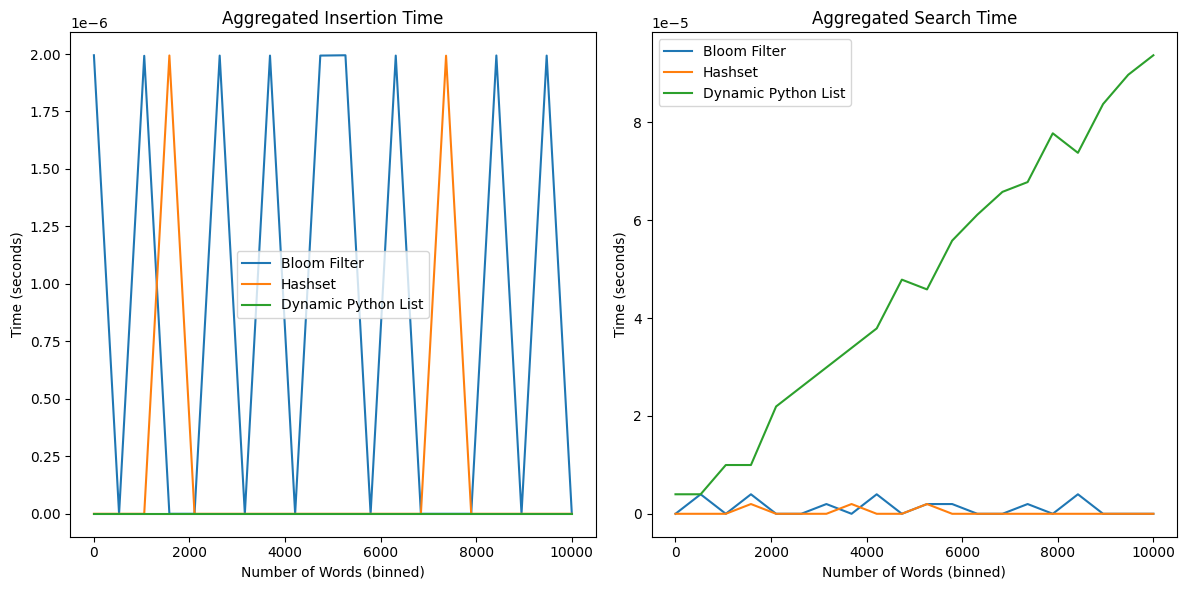

Results for get_random_strings


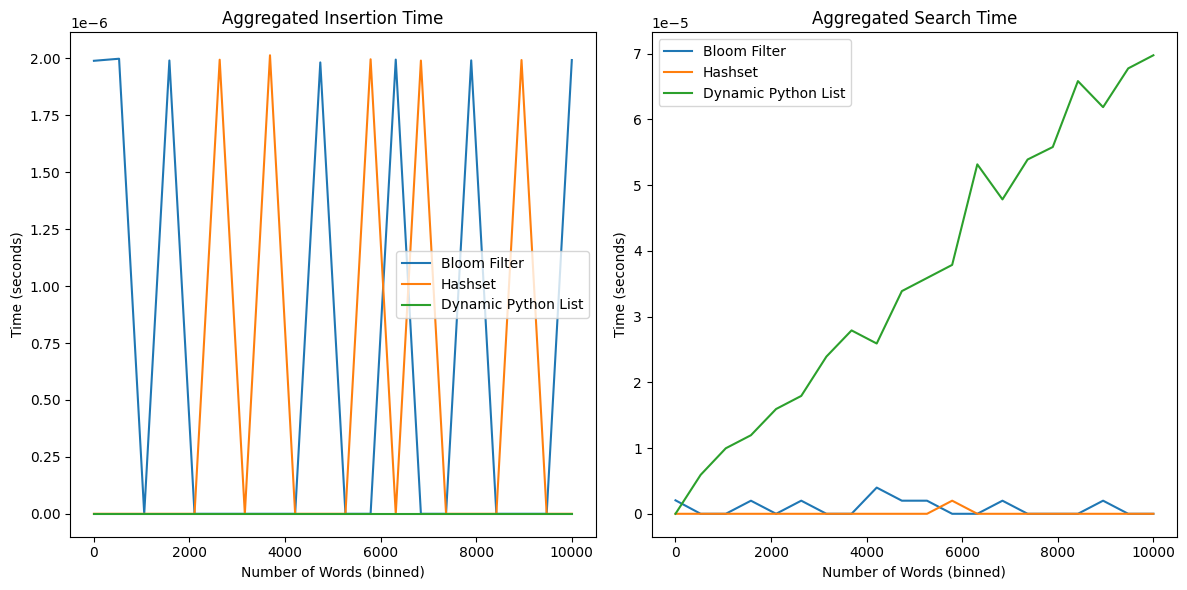

Results for get_dna_sequences


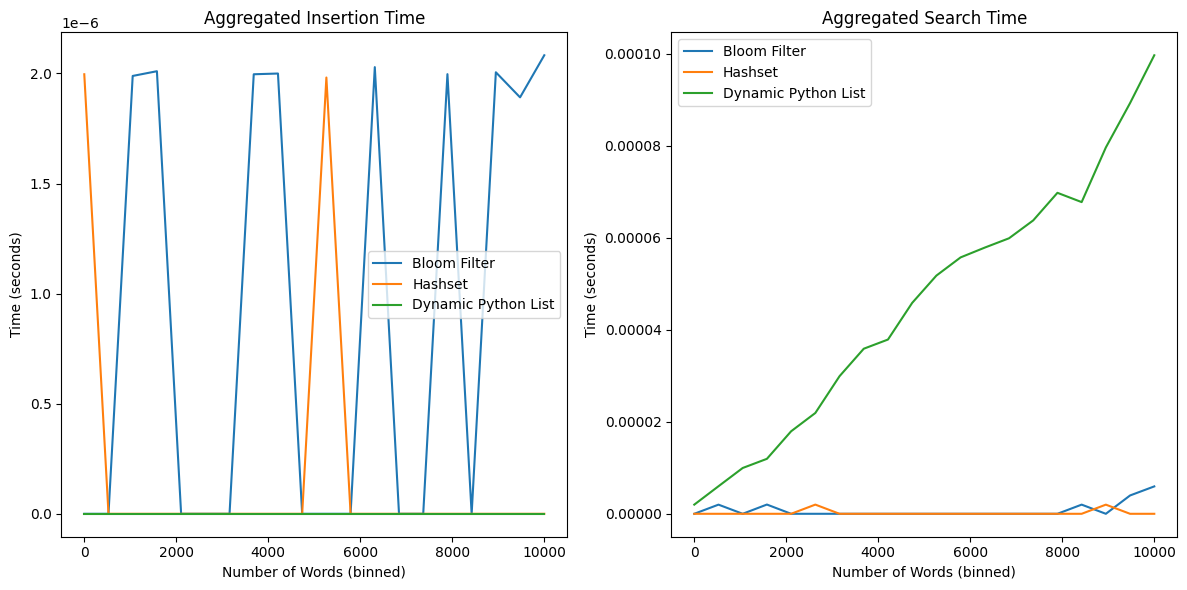

Results for get_urls


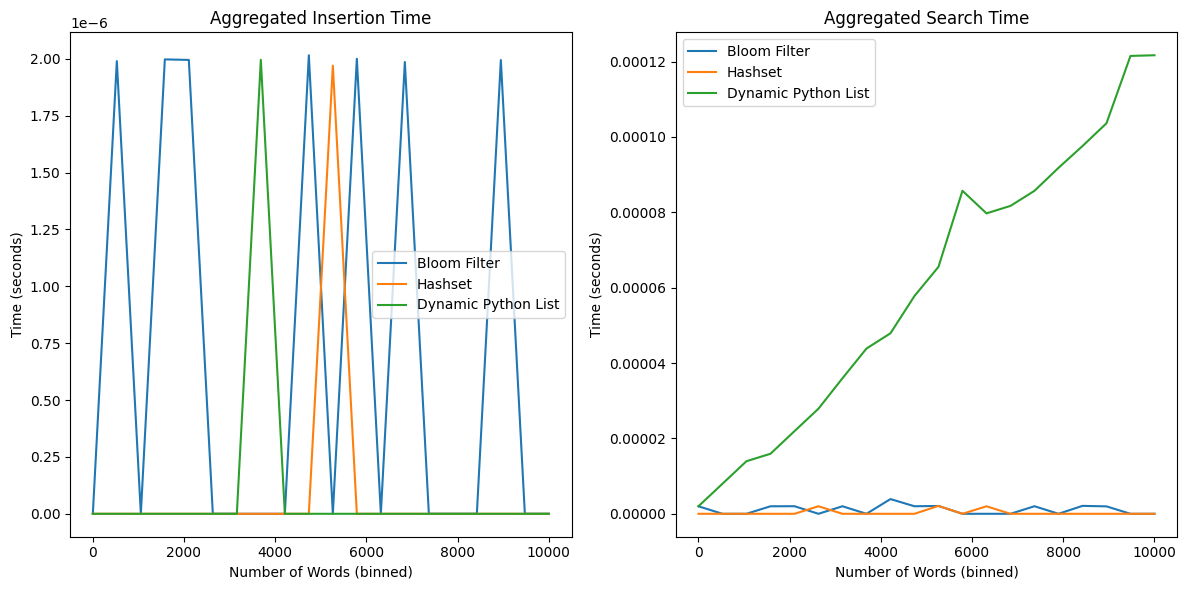

In [11]:
import json
import os
from matplotlib import pyplot as plt
from bloom_filter.bloom_filter import BloomFilter
import time
import numpy as np

from bloom_filter.hash_functions.murmur_hash import MurmurHash
from bloom_filter.hash_functions.city_hash import CityHash
from data.data_generator import get_natural_language_words, get_random_strings, get_dna_sequences, get_urls

def benchmark(words, bf_bit_capacity, bf_word_capacity, bf_hash_functions):
    # print(f"Benchmarking with {bf_bit_capacity}, {bf_word_capacity}, {bf_hash_functions}")
    
    # Set up the Bloom filter, hash table and Cuckoo filter with the given parameters
    bloom_filter = BloomFilter(bf_bit_capacity, bf_word_capacity, bf_hash_functions)
    hash_table = set()
    python_dynamic_list = []

    # Benchmark add/insert
    bloom_insert_timings = []
    hashset_insert_timings = []
    list_insert_timings = []

    for word in words:
        start_time_bf = time.time()
        bloom_filter.add_item(word)
        delta_time_bf = time.time() - start_time_bf
        bloom_insert_timings.append(delta_time_bf)

        start_time_hashset = time.time()
        hash_table.add(word)
        delta_time_hashset = time.time() - start_time_hashset
        hashset_insert_timings.append(delta_time_hashset)

        start_time_list = time.time()
        python_dynamic_list.append(word)
        delta_time_list = time.time() - start_time_list
        list_insert_timings.append(delta_time_list)

    # Benchmark search
    bloom_search_timings = []
    hashset_search_timings = []
    list_search_timings = []

    for word in words:
        start_time_bf = time.time()
        bloom_filter.add_item(word)
        delta_time_bf = time.time() - start_time_bf
        bloom_search_timings.append(delta_time_bf)

        start_time_hashset = time.time()
        word in hash_table
        delta_time_hashset = time.time() - start_time_hashset
        hashset_search_timings.append(delta_time_hashset)

        start_time_list = time.time()
        word in python_dynamic_list
        delta_time_list = time.time() - start_time_list
        list_search_timings.append(delta_time_list)

    return (bloom_insert_timings, hashset_insert_timings, list_insert_timings, bloom_search_timings, hashset_search_timings, list_search_timings)

def plot_benchmark_results(results, total_number_of_words):
    bloom_insert, hashset_insert, list_insert, bloom_search, hashset_search, list_search = results
    # Change number of bins if necessary
    number_of_bins = 20
    
    x = np.linspace(1, total_number_of_words, number_of_bins)
    def aggregate(data, number_of_bins):
        return np.array_split(data, number_of_bins)

    agg_bloom_insert = [np.mean(bin) for bin in np.array_split(bloom_insert, number_of_bins)]
    agg_hashset_insert = [np.mean(bin) for bin in np.array_split(hashset_insert, number_of_bins)]
    agg_list_insert = [np.mean(bin) for bin in np.array_split(list_insert, number_of_bins)]
    agg_bloom_search = [np.mean(bin) for bin in np.array_split(bloom_search, number_of_bins)]
    agg_hashset_search = [np.mean(bin) for bin in np.array_split(hashset_search, number_of_bins)]
    agg_list_search = [np.mean(bin) for bin in np.array_split(list_search, number_of_bins)]

    plt.figure(figsize=(12, 6))

    # Plot insertion
    plt.subplot(1, 2, 1)
    plt.plot(x, agg_bloom_insert, label='Bloom Filter')
    plt.plot(x, agg_hashset_insert, label='Hashset')
    plt.plot(x, agg_list_insert, label='Dynamic Python List')
    plt.title('Aggregated Insertion Time')
    plt.xlabel('Number of Words (binned)')
    plt.ylabel('Time (seconds)')
    plt.legend()

    # Plot search
    plt.subplot(1, 2, 2)
    plt.plot(x, agg_bloom_search, label='Bloom Filter')
    plt.plot(x, agg_hashset_search, label='Hashset')
    plt.plot(x, agg_list_search, label='Dynamic Python List')
    plt.title('Aggregated Search Time')
    plt.xlabel('Number of Words (binned)')
    plt.ylabel('Time (seconds)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Set benchmarking parameters here
    bit_capacity = 10 ** 3
    number_of_words_by_design = 10 ** 3
    actual_number_of_words = 10 ** 4
    hash_fns = [MurmurHash(), CityHash()]

    # Get words from data sources
    data_providers = [get_natural_language_words, get_random_strings, get_dna_sequences, get_urls]

    all_results = []
    # Benchmark for each data source
    for data_provider in data_providers:
        print(f"Results for {data_provider.__name__}")
        results = benchmark(data_provider(actual_number_of_words), bit_capacity, number_of_words_by_design, hash_fns)
        all_results.append(results)
        plot_benchmark_results(results, actual_number_of_words)


We can observe from the results that, when tested with bit size = 10^3, word number by design = 10^3 and actual words fed = 10^4, the Bloom filter does not perform very stable in virtually any of the 4 data types when it comes to insertion, but maintains a robust response time for searching. Python's dynamic list performs relatively well on insertion time, but on search time it scales very fast when faced with a growing number of elements and both hashset and Bloom filter outperform it.

Now, let's add the script above to ``benchmark.py`` and add some little changes. Firstly, let's increase the power of each parameter by 1.

```
    bit_capacity = 10 ** 4
    number_of_words_by_design = 10 ** 4
    actual_number_of_words = 10 ** 5
```

Then, we will also save all results and relay the JSON output into a file:

```
    all_results = []
    
    os.makedirs("results", exist_ok=True)
    with open("results/benchmark_results_actual_10_5.json", "w") as file:
        json.dump(all_results, file, indent=4)
```

Finally, we run the job script on HPC architecture (job script and output is available in the root directory in the repository). After the job finishes, we download the file from the server and we come back to the Jupyter notebook to visualise the results.

English words data


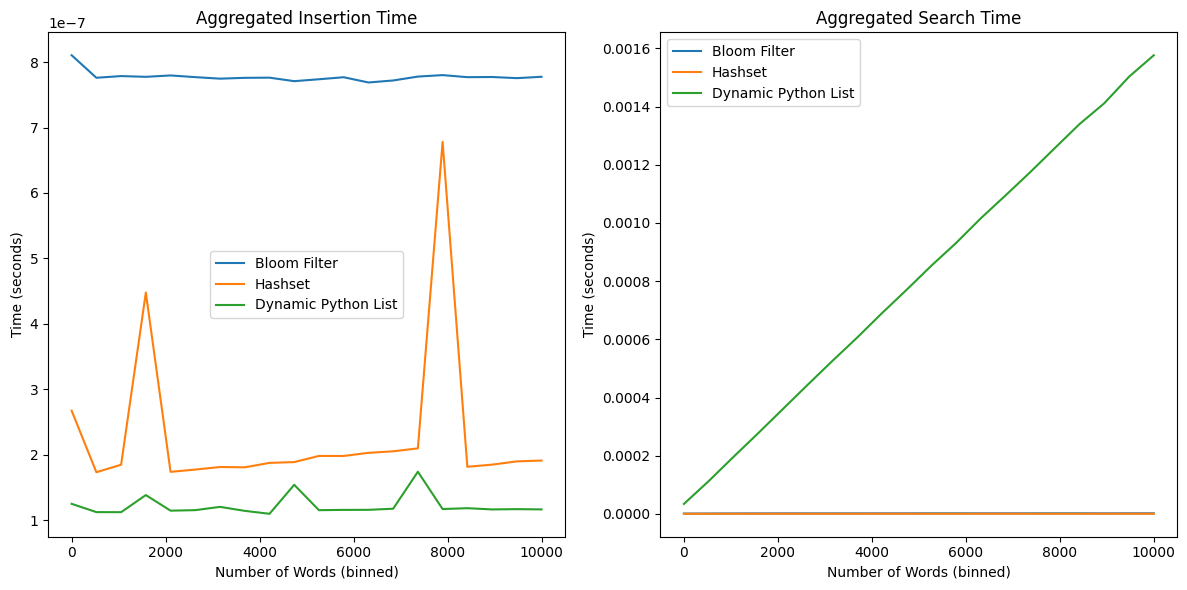

Random strings data


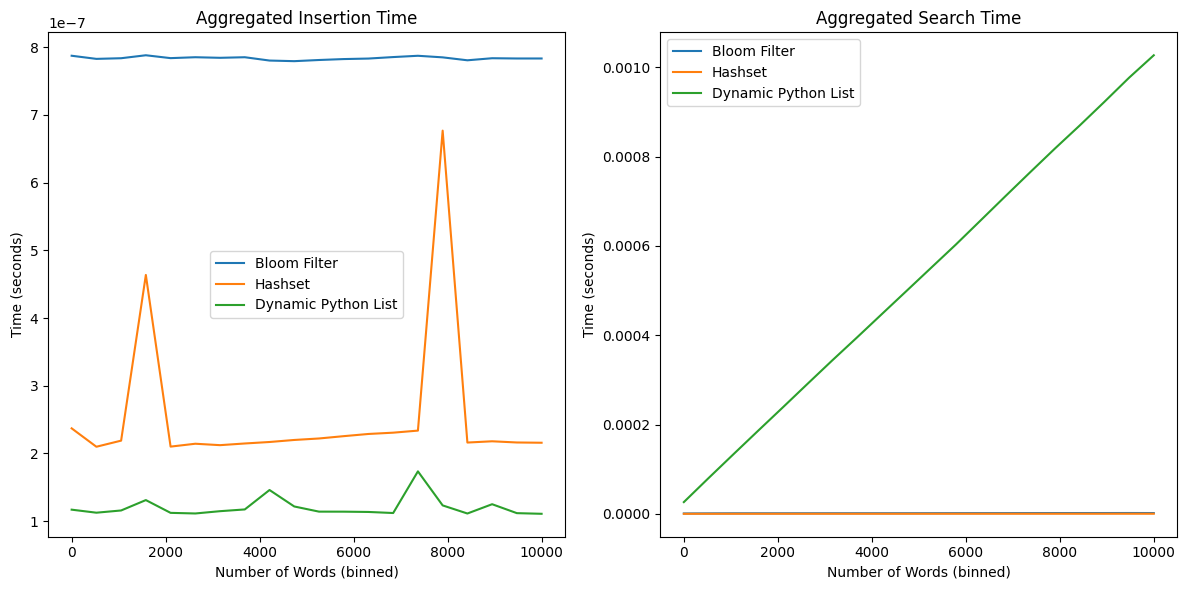

DNA Sequence data


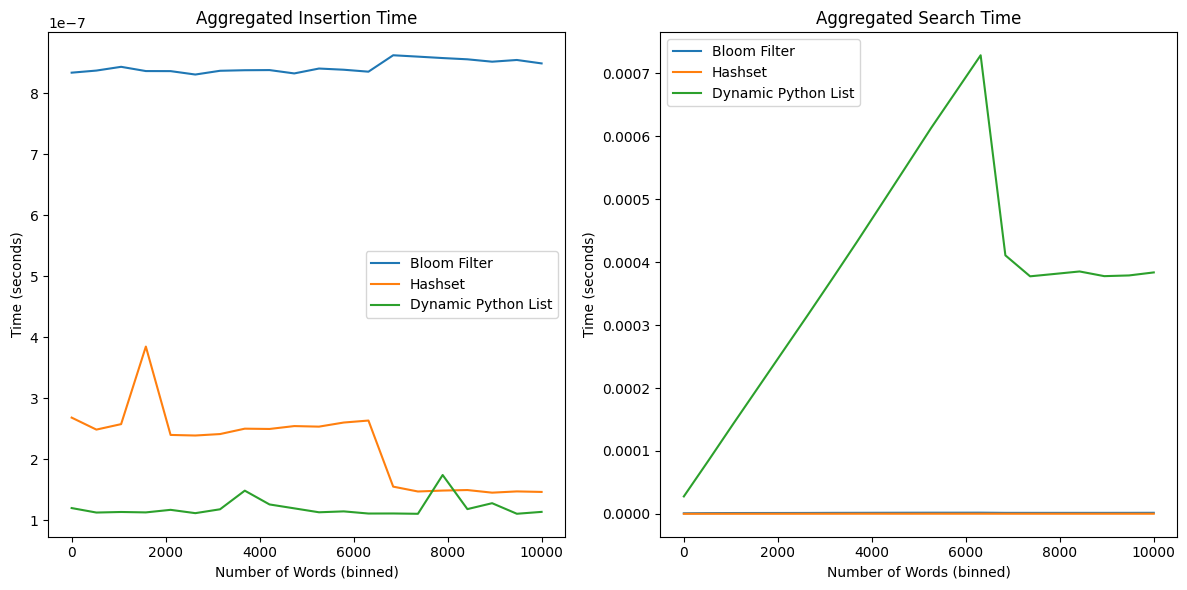

URL Data


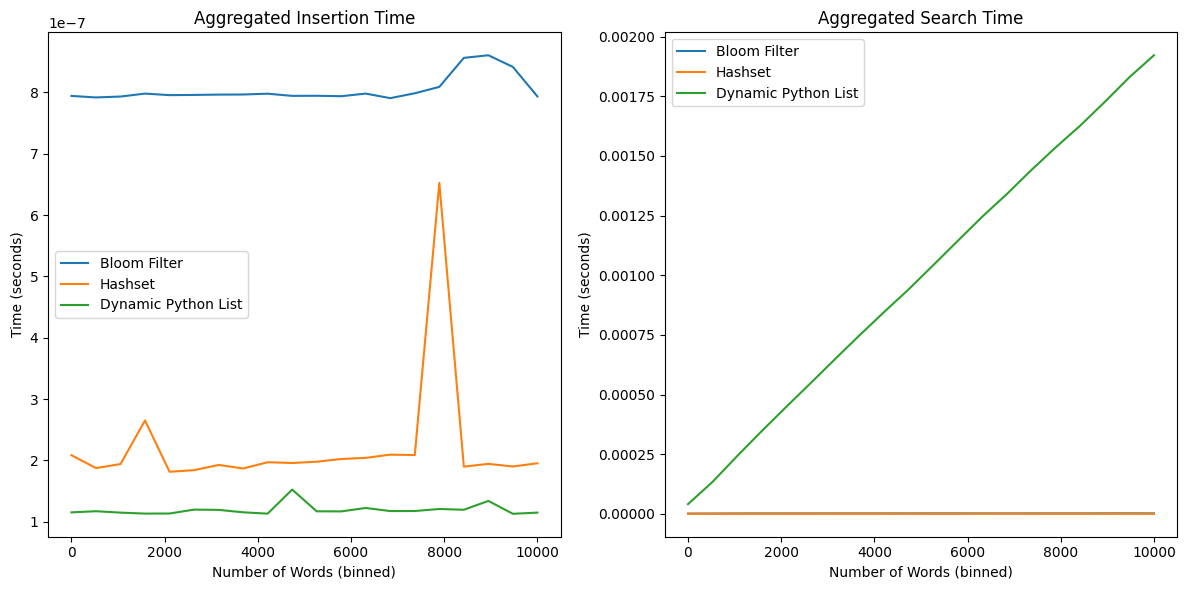

In [6]:
with open("results/benchmark_results_actual_10_5.json", "r") as file:
    results = json.load(file)
    
    # Clarification which data type graphs refer to
    data_type_name = ["URL Data", "DNA Sequence data", "Random strings data", "English words data"]
    
    for result_per_data_type in results:
        print(data_type_name.pop())
        plot_benchmark_results(result_per_data_type, actual_number_of_words)
        

What we observe from the second run gives us discerning and meaningful info about insertion time that we didnt have before, and confirms our assumptions about search time where nothing much has changed. It occurs that Python lists provides the fastest insertion time in all 4 categories, followed by hash tables, and is significantly faster than bloom filters. However, the real power of Bloom filters can be seen in search time which remains extremely low and constant, whereas the list struggles in that domain.

# Exploring FP rate as a function of words inserted

In [ ]:
fp_bitsize = 10 ** 4
fp_rate_number_of_words_by_design = 10 ** 4
fp_rate_actual_number_of_words = 10 ** 5
data_type_name = ["URL Data", "DNA Sequence data", "Random strings data", "English words data"]

fp_rates_results = []
        
for data_provider in data_providers:
    # Print data type 
    print(data_type_name.pop())
    
    words = data_provider(2*fp_rate_actual_number_of_words)
    random.shuffle(words)

    # 50:50 ratio => we get 2 different sets and each has the original number of words
    split_ratio = 0.5
    split_index = int(fp_rate_actual_number_of_words * split_ratio)
    training_set = words[:split_index]
    testing_set = words[split_index:]

    inserted_words = set()

    bloom_filter = BloomFilter(fp_bitsize, fp_rate_number_of_words_by_design, [MurmurHash(), CityHash()])

    false_positive_rates = []

    for j in range(int(fp_rate_actual_number_of_words*split_ratio)):
        word_to_add = training_set[j-1]
        bloom_filter.add_item(word_to_add)
        inserted_words.add(word_to_add)

        # For each 100 words, measure the FP rate
        if len(inserted_words) % 100 == 0:
            fp_number = 0
            for k in range(fp_rate_actual_number_of_words):
                word_fp_test = testing_set[k]
                if bloom_filter.check_for_item(word_fp_test) and word_fp_test not in inserted_words:
                    fp_number += 1
                    #print("err")
            result = (len(inserted_words), fp_number/fp_rate_actual_number_of_words)
            false_positive_rates.append(result)

    # print(false_positive_rates)
    fp_rates_results.append(false_positive_rates)



        

After we have calculated and saved the results in ```fp_rates_results```, we can visualise them:

English words data


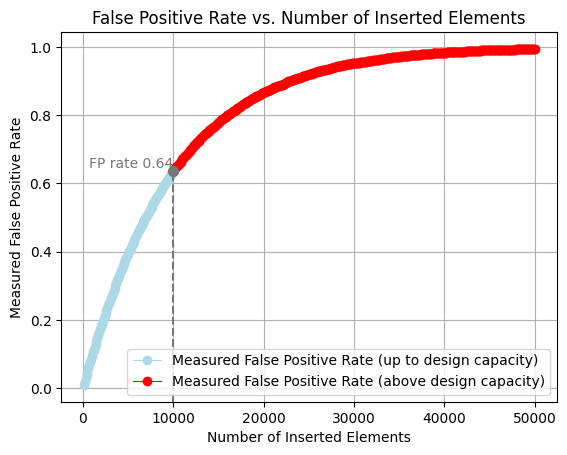

Random strings data


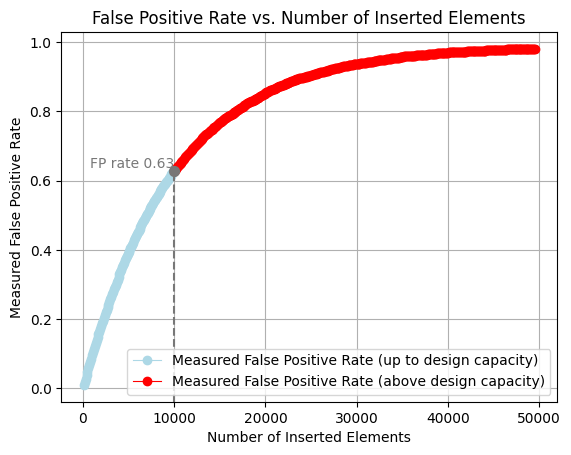

DNA Sequence data


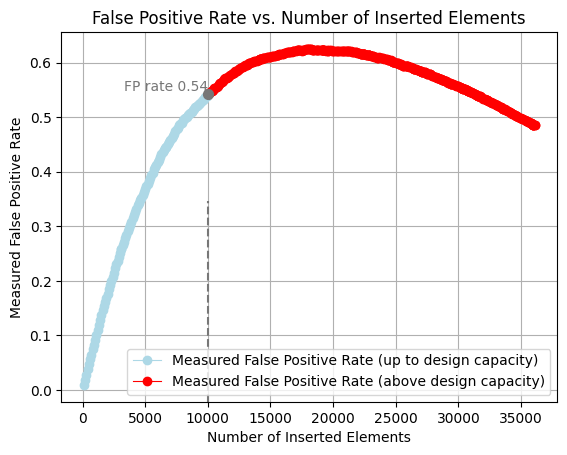

URL Data


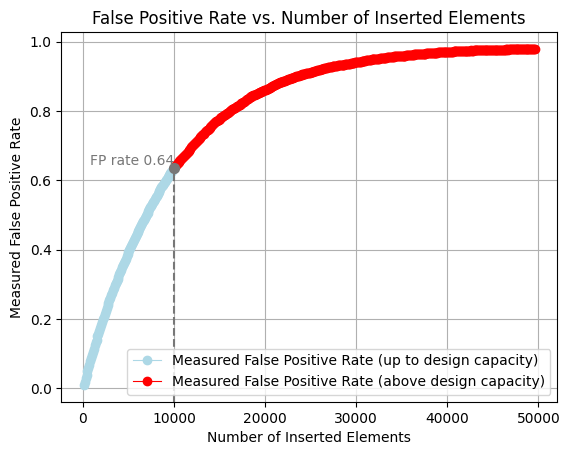

In [226]:
data_type_name = ["URL Data", "DNA Sequence data", "Random strings data", "English words data"]
        
for i in range(0,4):
    # Print data type 
    print(data_type_name.pop())

    # Extract the values for the data type
    data = fp_rates_results[i]
    x_values, y_values = zip(*data)

    # Calculate intersection point (max capacity) for visualisation purposes
    intersection_index = None
    for index, (x, y) in enumerate(data):
        if x == fp_rate_number_of_words_by_design:
            intersection_index = index
            break
    
    plt.style.use('default')
    plt.figure(dpi=100)
            
    # Plot the data before the intersection
    plt.plot(x_values[:intersection_index + 1], y_values[:intersection_index + 1], 
             marker='o', color='lightblue', linewidth=0.8, label='Measured False Positive Rate (up to design capacity)')
    
    # Plot the data after the intersection
    plt.plot(x_values[intersection_index:], y_values[intersection_index:], 
             marker='o', color='r', linewidth=0.8, label='Measured False Positive Rate (above design capacity)')
    
    # plot target FP - if necessary
    # target_false_positive_rate = 0.01
    # plt.axhline(y=target_false_positive_rate, color='grey', linestyle='--', label='Target False Positive Rate')
    
    # plot number of elements for which BF was designed
    plt.scatter([fp_rate_number_of_words_by_design], [y_values[intersection_index]], color='#777', s=50, zorder=11)
    plt.text(fp_rate_number_of_words_by_design, y_values[intersection_index],
             f'FP rate {y_values[intersection_index]:.2f}',
             fontsize=10, ha='right', va='bottom', color='#777', zorder=13)
    plt.axvline(x=fp_rate_number_of_words_by_design, color='#777', 
                linestyle='--', ymax=y_values[intersection_index])
    
    # Miscellaneous
    plt.xlabel('Number of Inserted Elements')
    plt.ylabel('Measured False Positive Rate')
    plt.title('False Positive Rate vs. Number of Inserted Elements')
    plt.legend()
    plt.grid()
    plt.show()


As expected, FP rate increases significantly after we fill up the capacity of the Bloom filter.

# Exploring the compression rate of a Bloom filter

For this part, we will analyze the compression rate of the filter as a function of the theoretical FP rate and the expected number of elements. 
From these two parameters, we can extract *m* (the bit array size) via formula and create a new bloom filter with the m and n required. Observed FP data can be used from the previous question in further project development, if required. 

We define "compression rate" here as determining how much of the capacity remains unused. This can help us for future studies where we can estimate if the filter can still take in elements without big changes to the FP rate.

English words data


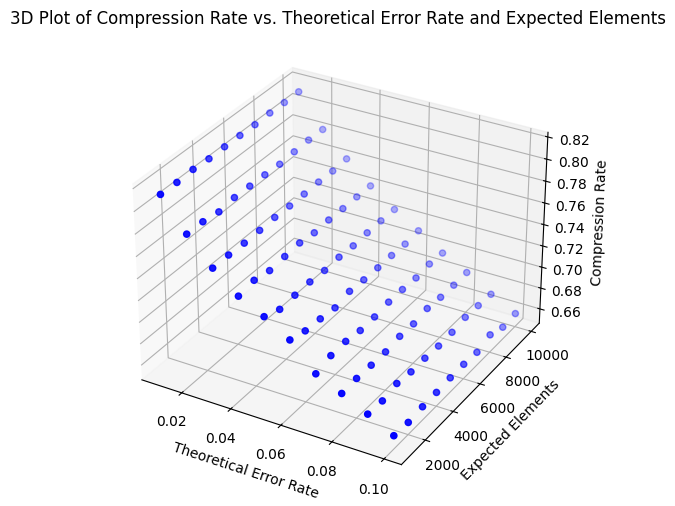

Random strings data


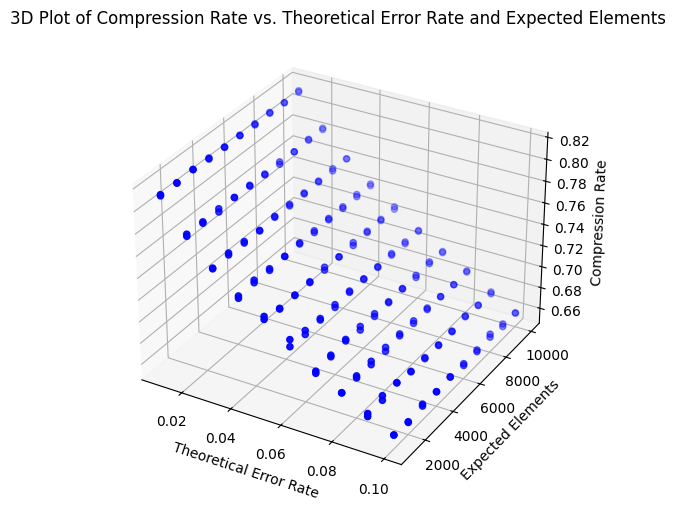

DNA Sequence data


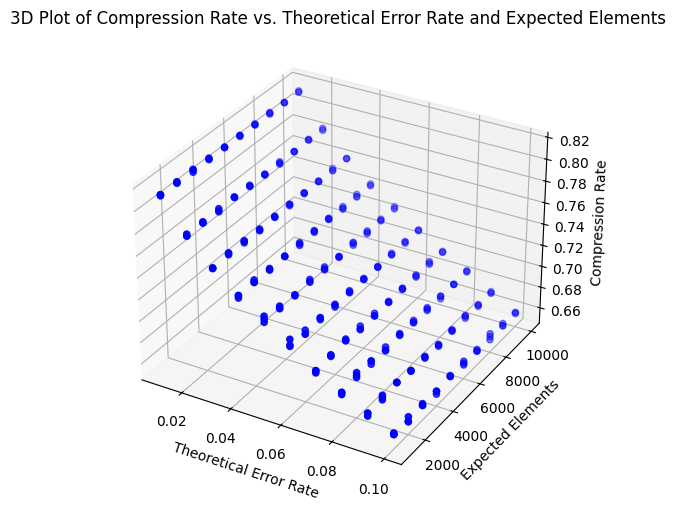

URL Data


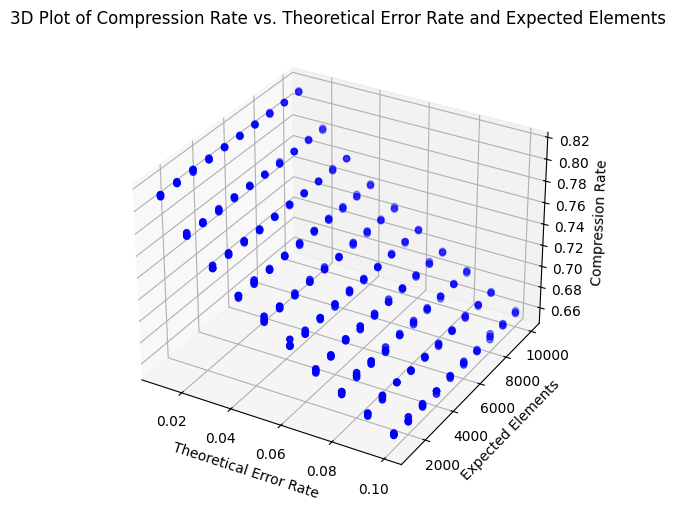

In [12]:
import math
data_type_name = ["URL Data", "DNA Sequence data", "Random strings data", "English words data"]

compression_rate_list = []
expected_elements_list = []
error_rate_list = []

for data_provider in data_providers:
    # Print data type 
    print(data_type_name.pop())
    
    for compr_expected_elements in np.linspace(10**3, 10**4, 10, dtype=int):
        for compr_error_rate in np.linspace(0.01, 0.1, 10):
            
            # print(f"Expected elements: {compr_expected_elements}")
            # print(f"Error rate: {compr_error_rate}")
            # print(f"Bitsize: {compr_bitsize}")
            # Calculate bitsize using formula with n and p
            compr_bitsize = math.ceil(-compr_expected_elements * math.log(compr_error_rate) / (math.log(2) ** 2))
            compr_bf = BloomFilter(compr_bitsize, compr_expected_elements, [MurmurHash(), CityHash()])
            
            # Add the maximum number of words by design
            words = data_provider(compr_expected_elements)
            random.shuffle(words)
            for word in words:
                compr_bf.add_item(word)
        
            # Check compression rate
            compr_rate = compr_bf.get_compression_rate()
            # print(f"Compression Rate: {compr_rate:.4f}")

            compression_rate_list.append(compr_rate)
            expected_elements_list.append(compr_expected_elements)
            error_rate_list.append(compr_error_rate)

    # plotting
    compression_rates_array = np.array(compression_rate_list)
    expected_elements_array = np.array(expected_elements_list)
    error_rate_array = np.array(error_rate_list)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(error_rate_array, expected_elements_array, compression_rates_array, c='b', marker='o')
    
    ax.set_xlabel('Theoretical Error Rate')
    ax.set_ylabel('Expected Elements')
    ax.set_zlabel('Compression Rate')
    ax.set_title('3D Plot of Compression Rate vs. Theoretical Error Rate and Expected Elements')
    
    # Show the plot
    plt.show()




From the graphs above we can see that the compression rate generally decreases with an increasing error rate, which suggests more bits are needed to keep the error rate lower. Let's also take a look at the URL data plot from different perspectives for some extra details.

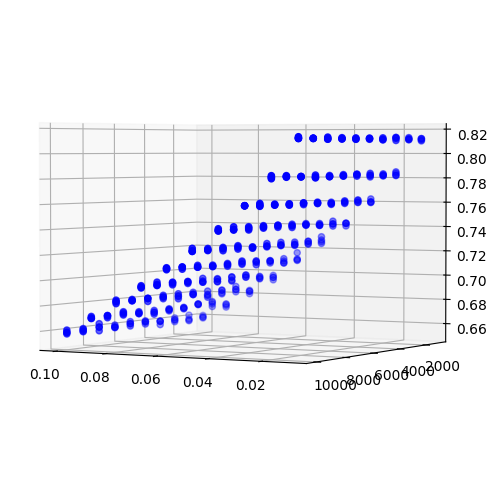

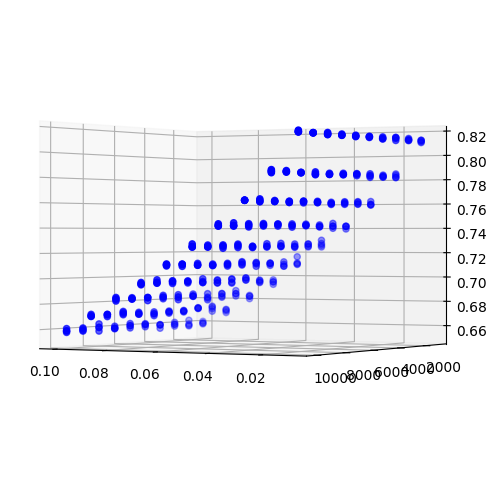

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(error_rate_array, expected_elements_array, compression_rates_array, c='b', marker='o')
ax.view_init(elev=2, azim=120) 

plt.show()


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(error_rate_array, expected_elements_array, compression_rates_array, c='b', marker='o')
ax.view_init(elev=0, azim=120) 

plt.show()